In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
aqi = pd.read_csv("C:/Users/visha/OneDrive/Desktop/DMV pratical/DMV 5/data.csv", encoding = "ISO-8859-1", parse_dates=['date'], low_memory=False)
aqi.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
sns.set(style="ticks", rc = {'figure.figsize':(20,15)})
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(aqi.isnull().sum())
print(aqi.shape)
aqi.info()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64
(435742, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     43573

In [5]:
aqi.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True) #dropping columns that aren't required
aqi = aqi.dropna(subset=['date']) # dropping rows where no date is available
aqi.state = aqi.state.replace({'Uttaranchal':'Uttarakhand'})
aqi.state[aqi.location == "Jamshedpur"] = aqi.state[aqi.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}
aqi.type = aqi.type.replace(types)

In [6]:
aqi.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [7]:
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
aqi[VALUE_COLS] = imputer.fit_transform(aqi[VALUE_COLS])

In [9]:
print(aqi.isnull().sum())
aqi.tail()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64


,state,location,type,so2,no2,rspm,spm,pm2_5,date
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,220.78348,40.791467,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,220.78348,40.791467,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,220.78348,40.791467,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,220.78348,40.791467,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,220.78348,40.791467,2015-12-29


In [10]:
def plot_for_state(state):
    fig, ax = plt.subplots(2,2, figsize=(20,12))
    fig.suptitle(state, size=20)
    state = aqi[aqi.state == state]
    state = state.reset_index().set_index('date')[VALUE_COLS].resample('Y').mean()
    state.so2.plot(legend=True, ax=ax[0][0], title="so2")
    ax[0][0].set_ylabel("so2 (µg/m3)")
    ax[0][0].set_xlabel("Year")
    state.no2.plot(legend=True, ax=ax[0][1], title="no2")
    ax[0][1].set_ylabel("no2 (µg/m3)")
    ax[0][1].set_xlabel("Year")
    state.rspm.plot(legend=True, ax=ax[1][0], title="rspm")
    ax[1][0].set_ylabel("RSPM (PM10 µg/m3)")
    ax[1][0].set_xlabel("Year")
    state.spm.plot(legend=True, ax=ax[1][1], title="spm")
    ax[1][1].set_ylabel("SPM (PM10 µg/m3)")
    ax[1][1].set_xlabel("Year")

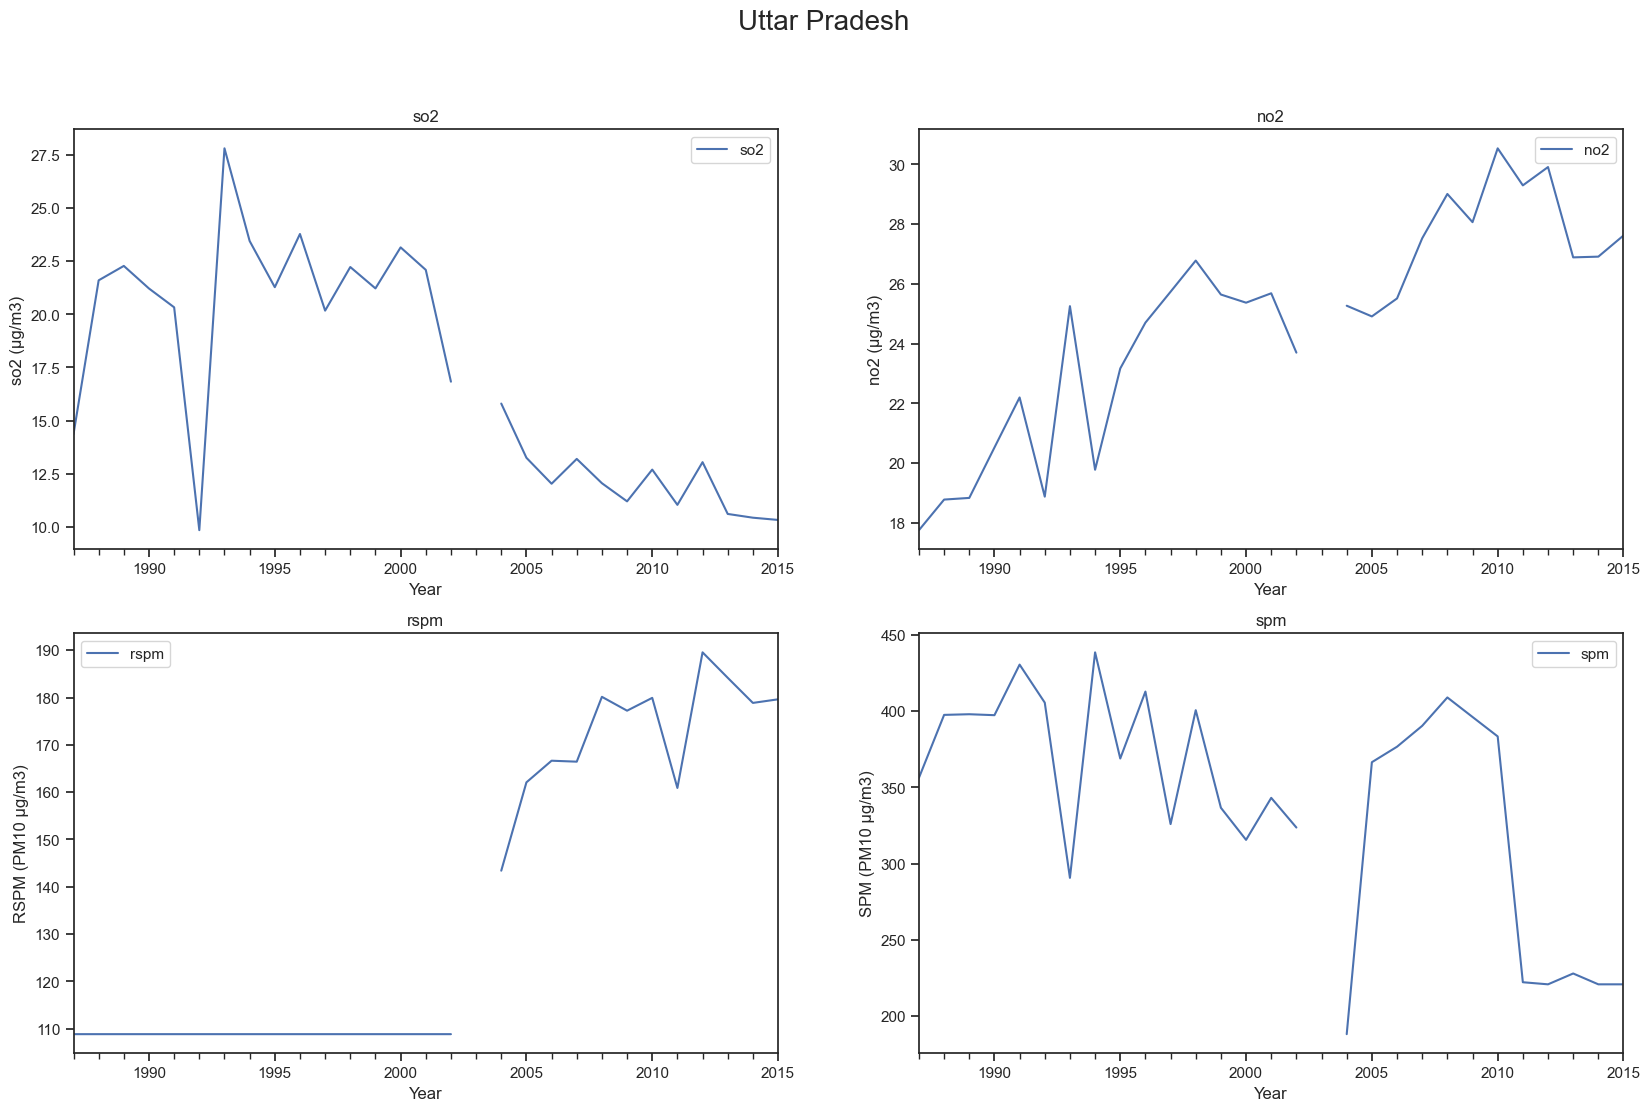

In [11]:
plot_for_state("Uttar Pradesh")

In [ ]:
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2)
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))

    ind = aqi[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red')
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator))
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")

    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green')
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator))
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State")

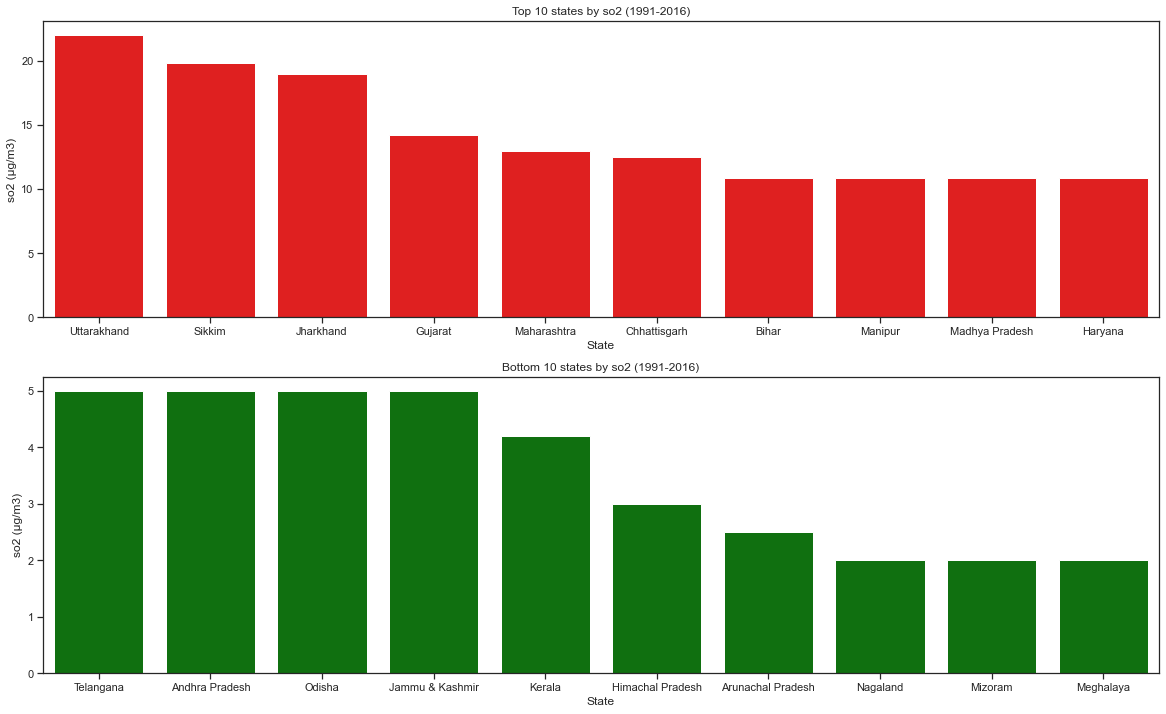

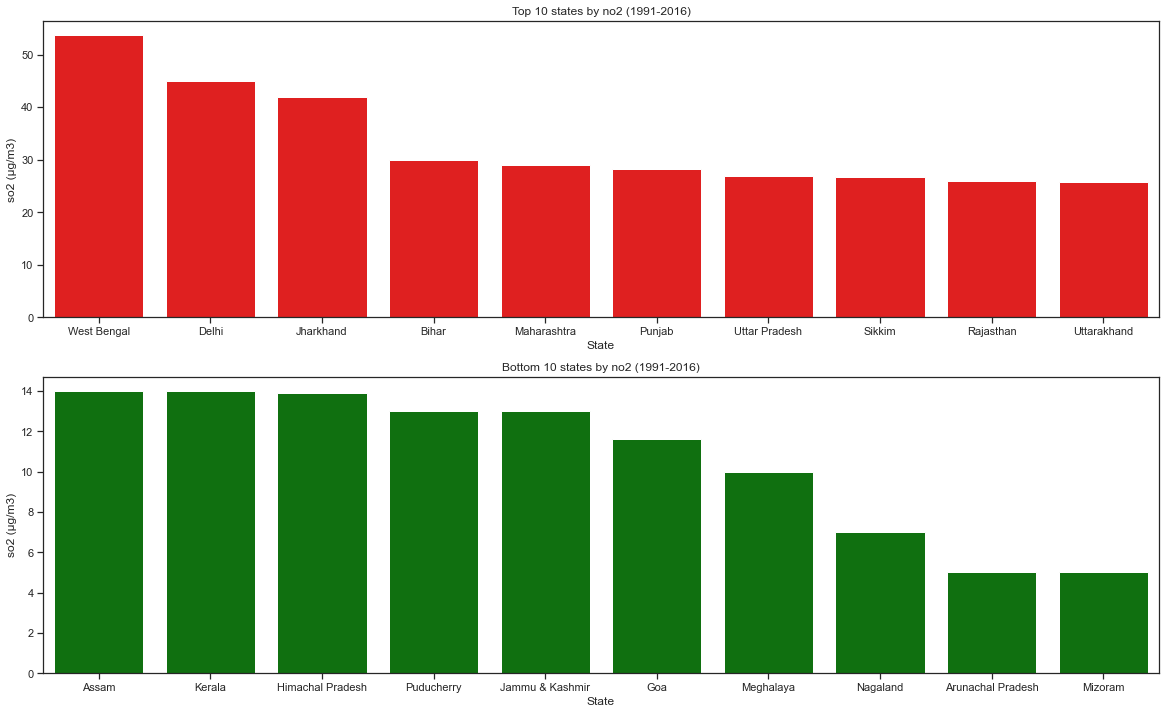

In [ ]:
top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

Plotting for SO2, we can see that the top state is Uttarakhand, while the bottom state is Meghalaya.

Plotting for NO2, we can see that the top state is West Bengal, while the bottom state is Mizoram.

# Plotting the highest ever recorded levels

In [ ]:
# defining a function to find the highest ever recorded levels for a given indicator (defaults to SO2) by state
# sidenote: mostly outliers
def highest_levels_recorded(indicator="so2"):
    plt.figure(figsize=(20,10))
    ind = aqi[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)

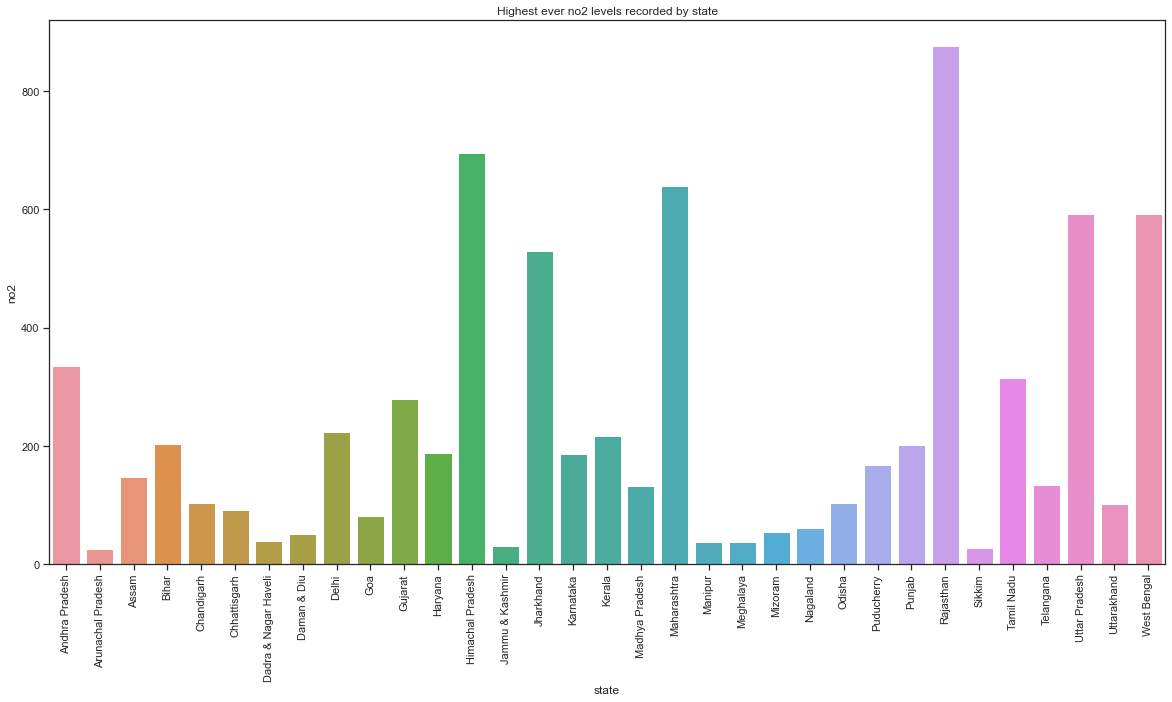

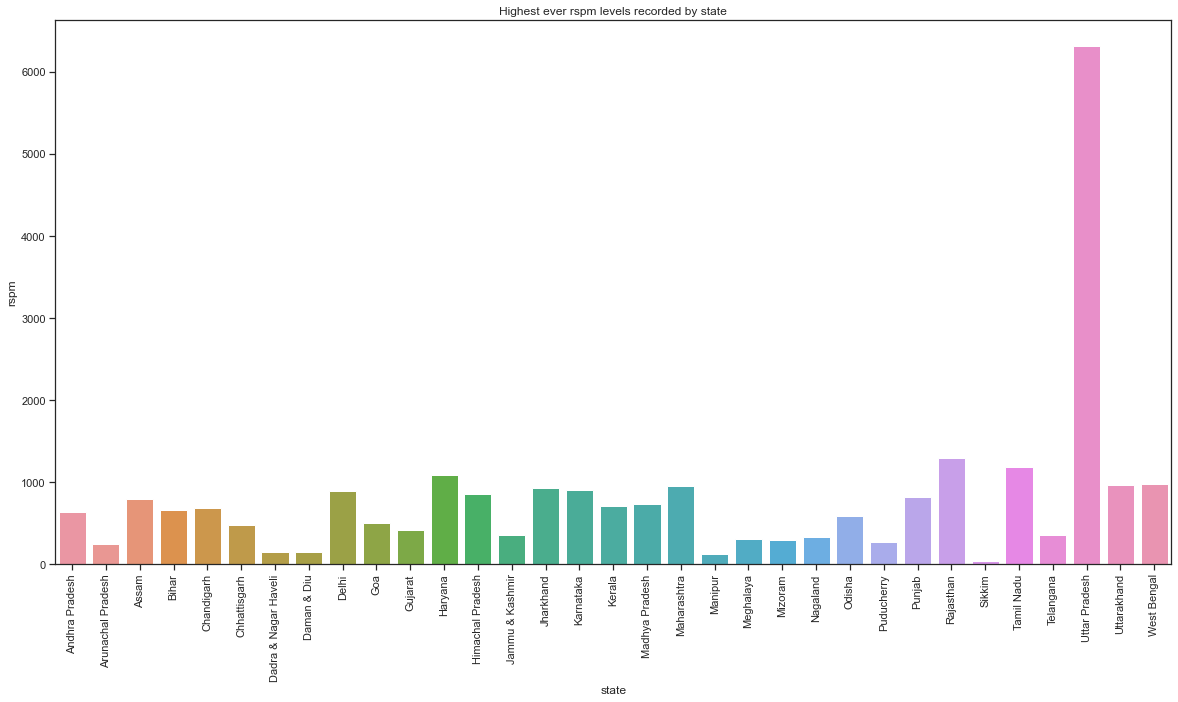

In [ ]:
highest_levels_recorded("no2")
highest_levels_recorded("rspm")

Plotting for NO2, we can see that Rajasthan recorded the highest ever NO2 level. Plotting for RSPM, we can see that Uttar Pradesh recorded the highest ever RSPM level.

# Plotting yearly trends

In [ ]:
# defining a function to plot the yearly trend values for a given indicator (defaults to SO2) and state (defaults to overall)
def yearly_trend(state="", indicator="so2", ):
    plt.figure(figsize=(20,12))
    aqi['year'] = aqi.date.dt.year
    if state is "":
        year_wise = aqi[[indicator, 'year', 'state']].groupby('year', as_index=False).median()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly trend of {}'.format(indicator))
    else:
        year_wise = aqi[[indicator, 'year', 'state']].groupby(['state','year']).median().loc[state].reset_index()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly trend of {} for {}'.format(indicator, state))

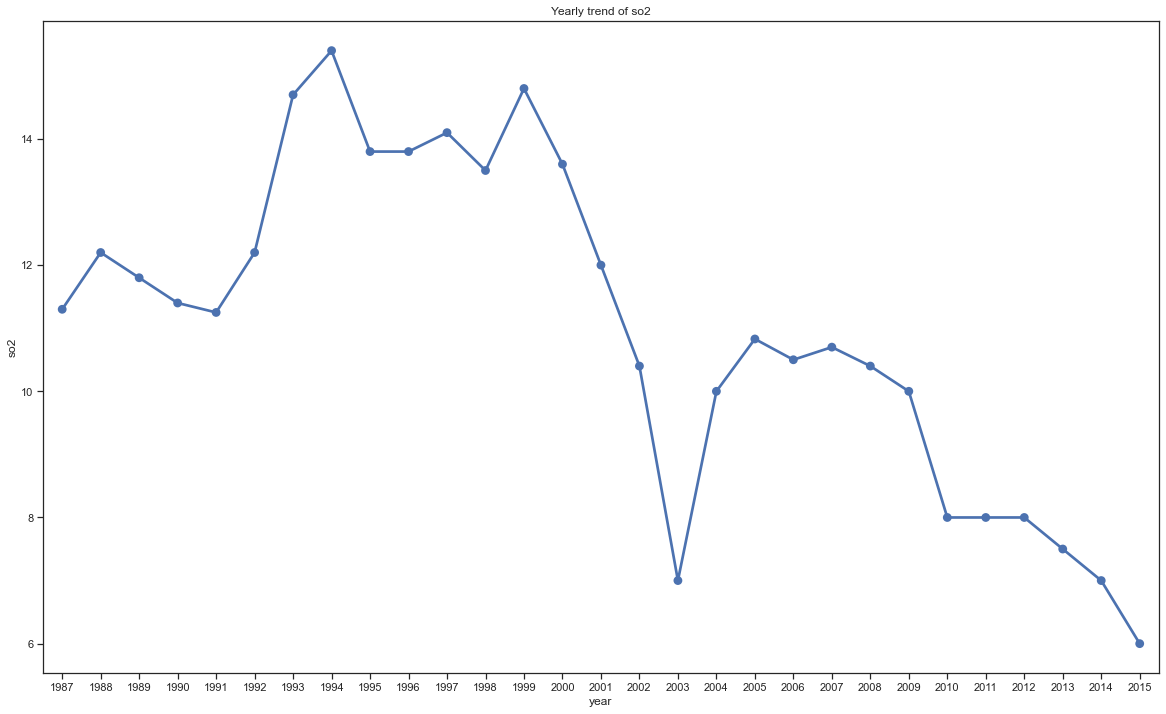

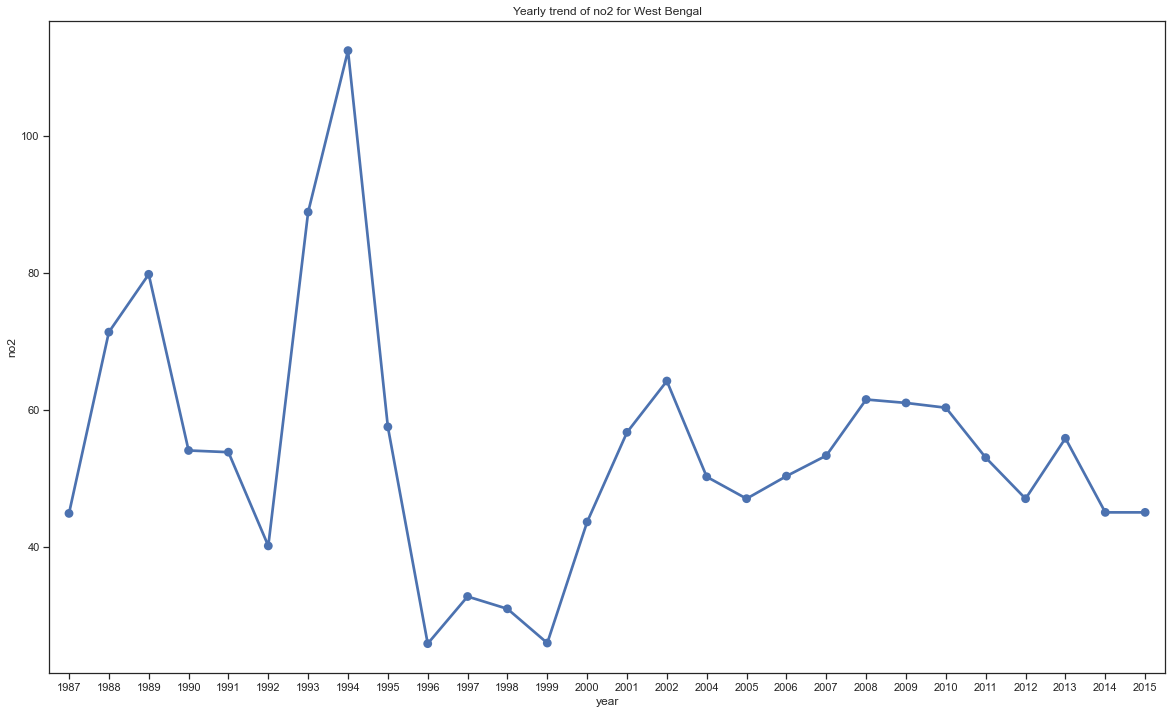

In [ ]:
yearly_trend()
yearly_trend("West Bengal", "no2")

Plotting for SO2, we can see the yearly trend for sulphur dioxide levels in the country. Plotting for NO2 in West Bengal, we can see the yearly trend.

# Plotting a heatmap for a particular indicator

In [ ]:
# defining a function to plot a heatmap for yearly median average for a given indicator (defaults to SO2)
def indicator_by_state_and_year(indicator="so2"):
    plt.figure(figsize=(20, 20))
    hmap = sns.heatmap(
        data=aqi.pivot_table(values=indicator, index='state', columns='year', aggfunc='median', margins=True),
               annot=True, linewidths=.5, cbar=True, square=True, cmap='inferno', cbar_kws={'label': "Annual Average"})

    hmap.set_title("{} by state and year".format(indicator))

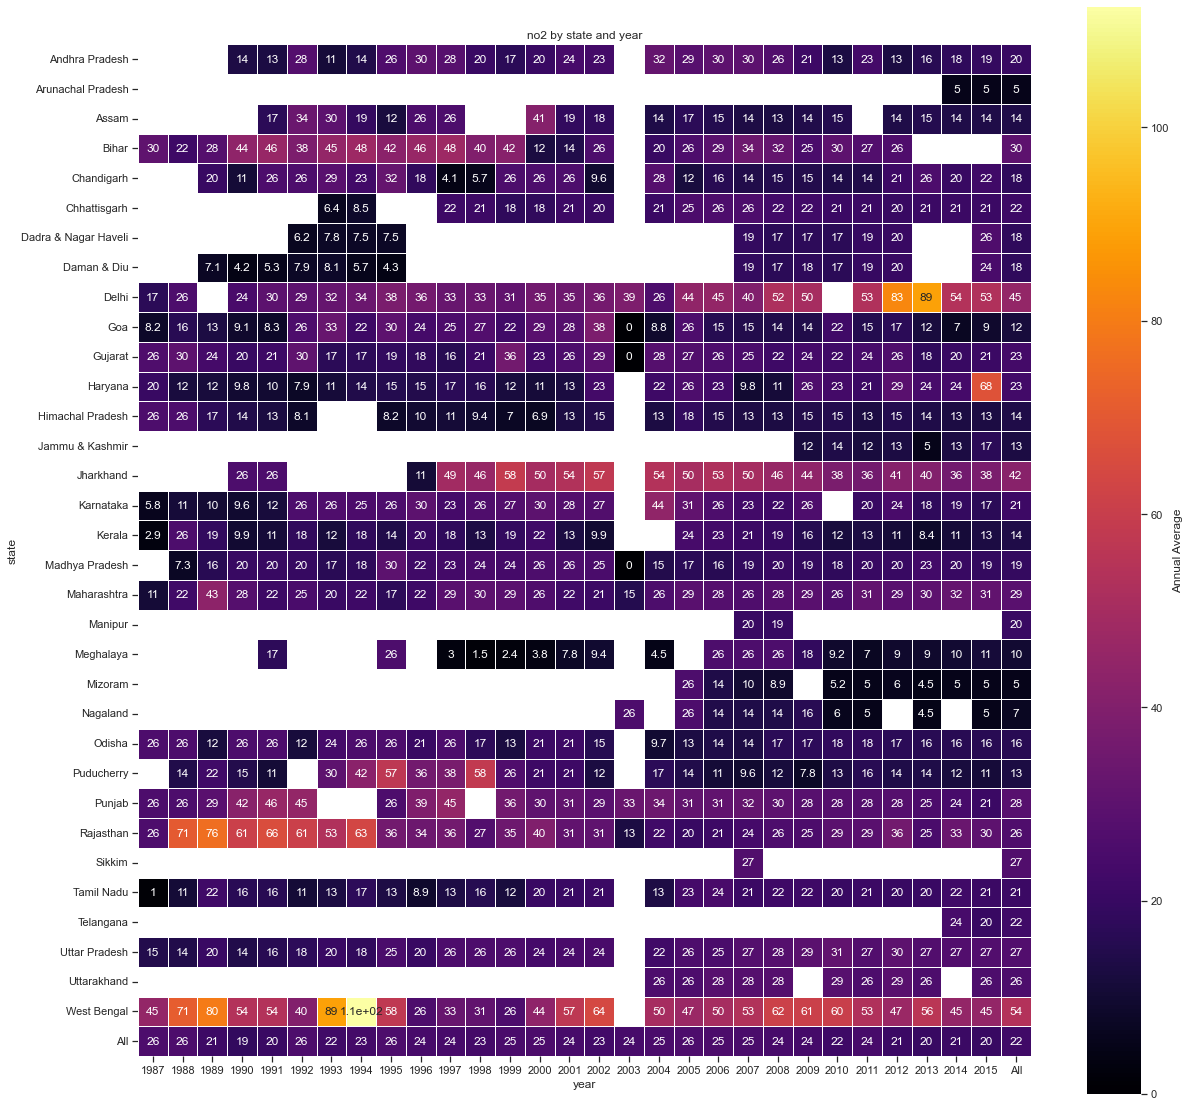

In [ ]:
indicator_by_state_and_year('no2')

# Plotting pollutant average by type

In [ ]:
# defining a function to plot pollutant averages by type for a given indicator
def type_avg(indicator=""):
    type_avg = aqi[VALUE_COLS + ['type', 'date']].groupby("type").mean()
    if indicator is not "":
        t = type_avg[indicator].plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator))
    else:
        t = type_avg.plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type")

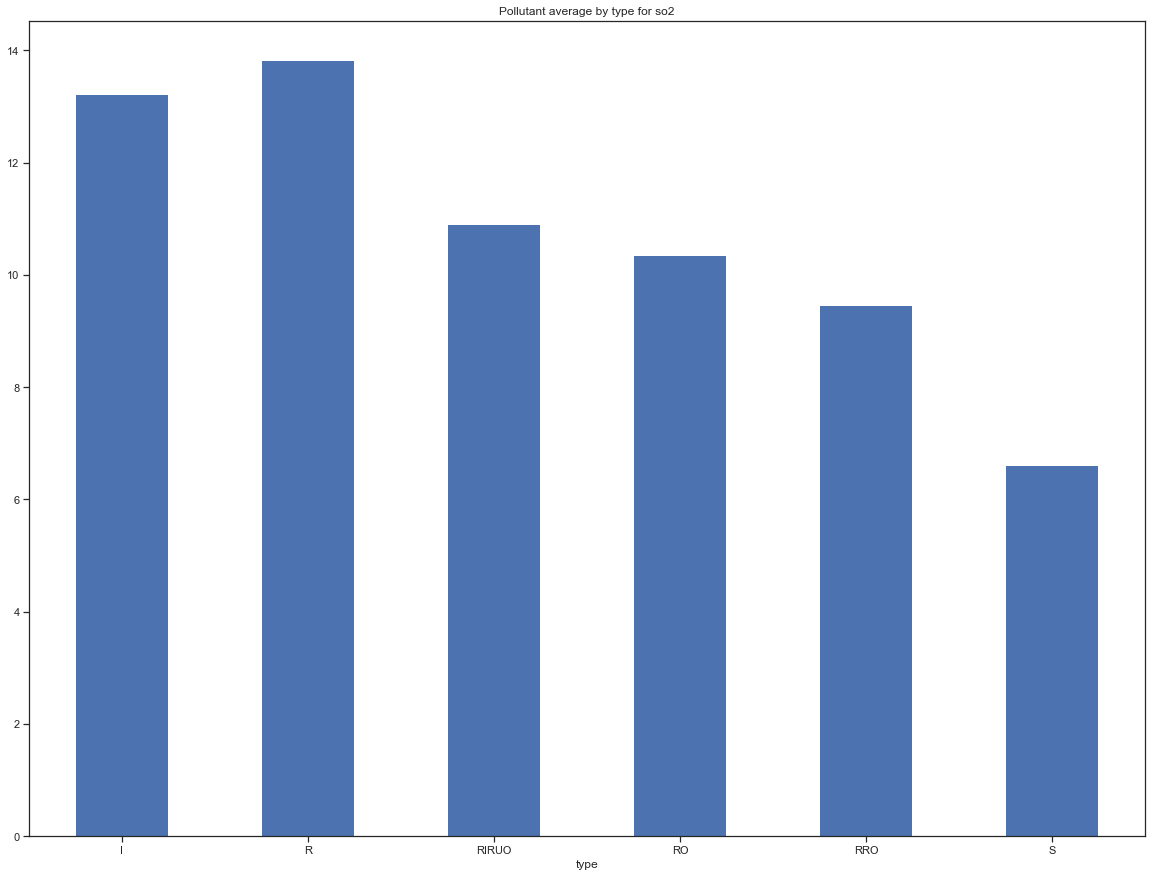

In [ ]:
type_avg('so2')

# Plotting pollutant averages by locations/state

In [ ]:
# defining a function to plot pollutant averages for a given indicator (defaults to SO2) by locations in a given state
def location_avgs(state, indicator="so2"):
    locs = aqi[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    plt.xticks(rotation = 90)

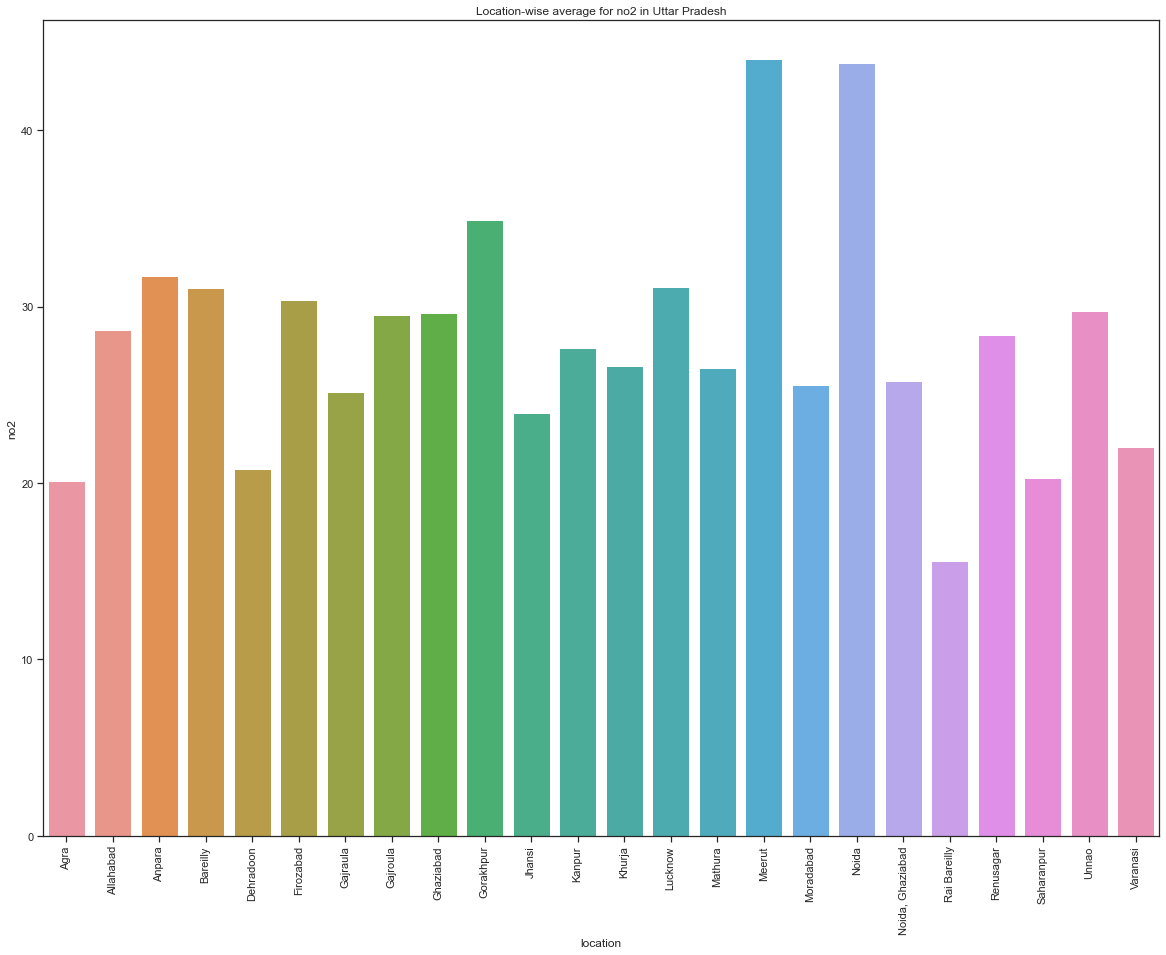

In [ ]:
location_avgs("Uttar Pradesh", "no2")